In [1]:
%load_ext autoreload
%autoreload 2

In [17]:
# import gdown
# gdown.download(id='1d5C5cgHIxWGsFR1vYs5XrQbbUiZl9TX2') #gmflow weights

In [2]:
import sys
sys.path.append('../src')

In [3]:
import torch

from data.scannet.utils import ScanNetDataset
from matching.gmflow.gmflow.gmflow import GMFlow

In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = GMFlow(num_scales=2, upsample_factor=4, fine_tuning=True)
model.to(device)
model.load_state_dict(torch.load('../src/matching/gmflow/weights/pretrained/gmflow_with_refine_kitti-8d3b9786.pth')['model'])

<All keys matched successfully>

In [7]:
train_data = ScanNetDataset(
    root_dir='/home/project/data/scans/',
    npz_path='/home/project/ScanNet/train_indicies_subset.npz',
    intrinsics_path='/home/project/ScanNet/scannet_indices/intrinsics.npz',
    mode='train'
)

In [10]:
data = train_data[0]
image0 = data['image0'].to(device)
image1 = data['image1'].to(device)

In [11]:
# model.eval()

with torch.no_grad():
    out = model(image0, image1,
          attn_splits_list=[2, 8],
          corr_radius_list=[-1, 4],
          prop_radius_list=[-1, 1])

/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [18]:
x = {1:2}
z = x.pop(1)
z

2

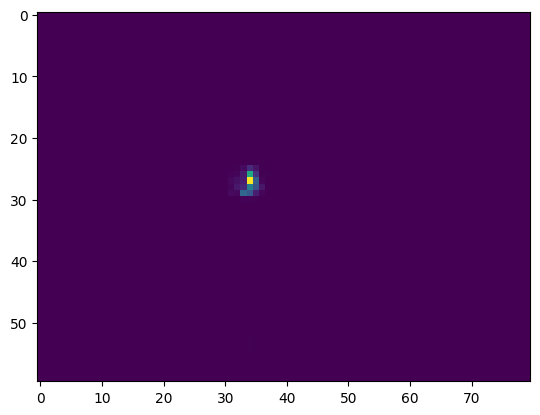

In [101]:
import matplotlib.pyplot as plt
plt.imshow(out[0, 1300].reshape(60, 80).numpy())

In [86]:
out[0, 4]

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.3996e-26, 5.2697e-21, 4.6645e-13, 2.6590e-05, 7.9055e-01, 1.9747e-01,
        4.6921e-06, 3.3786e-13, 1.2987e-20, 1.6326e-28, 5.5543e-23, 1.8288e-14,
        3.3634e-07, 8.3593e-03, 3.5727e-03, 7.3008e-08, 4.3031e-15, 1.0054e-22,
        2.5557e-31, 7.5363e-26, 2.7591e-17, 2.7873e-10, 1.2790e-05, 6.6452e-06,
        1.6113e-10, 7.1689e-18, 1.1005e-25, 1.2869e-33, 3.5238e-28, 1.1685e-19,
        8.6057e-13, 4.4265e-08, 3.2353e-08, 1.1139e-12, 5.5782e-20, 8.1236e-28,
        1.1986e-34, 3.3606e-29, 1.0320e-

In [39]:
x = torch.rand(2, 2, 60, 80)

In [40]:
import torch.nn.functional as F
up_flow = F.unfold(4 * x, [3, 3], padding=1)

In [63]:
model.training

False

In [17]:
import matplotlib.pyplot as plt

In [58]:
out['flow_preds']хъ

[tensor([[[[128.6536, 126.6613, 118.8098,  ...,  40.7568,  49.5679,  36.8426],
           [128.5580, 128.6354, 128.3964,  ...,  36.7445,  36.6466,  36.7180],
           [128.6537, 128.6553, 128.6547,  ...,  36.5990,  36.6165,  36.6784],
           ...,
           [136.3147, 135.4628, 134.7352,  ...,  98.9080,  98.9080,  98.9080],
           [136.2433, 135.3924, 134.7822,  ...,  98.9636,  98.9532,  98.9081],
           [136.0498, 135.9125, 135.3128,  ...,  99.2729,  99.1826,  98.9671]],
 
          [[ 86.2831,  87.9524,  92.9614,  ...,  64.4839,  55.2553,  68.5710],
           [ 86.3666,  86.2984,  86.2501,  ...,  68.6757,  68.7786,  68.7044],
           [ 86.2828,  86.2836,  86.2824,  ...,  68.8324,  68.8103,  68.7457],
           ...,
           [ 51.6812,  51.1618,  51.1547,  ...,  49.4954,  49.4954,  49.4954],
           [ 51.8823,  51.6828,  51.0839,  ...,  49.5051,  49.5033,  49.4954],
           [ 52.3377,  52.1803,  51.8136,  ...,  49.5588,  49.5430,  49.5056]]]])]

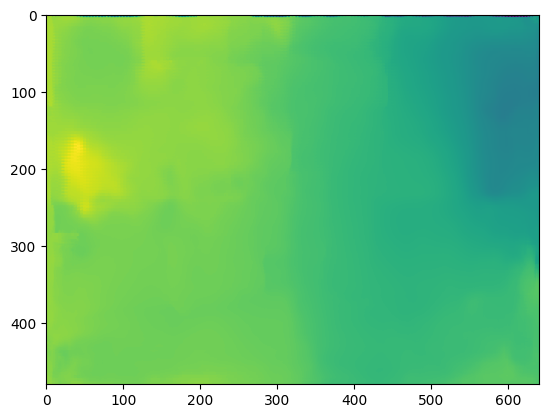

In [55]:
magnitude = (
    (out['flow_preds'][0].squeeze()[0].numpy() / 480 ** 2)
    + (out['flow_preds'][0].squeeze()[1].numpy() / 640 ** 2)) ** 0.5

plt.imshow(magnitude)